In [37]:
import pandas as pd
import json, ujson
from pandas.io.json import json_normalize

from pandas_help import colour_dtype, get_mem_usage

In [ ]:
df = pd.read_table("sample.log", sep="\\n", header=None)

In [13]:
df.head()

,0
0,"{""ts"":""2018-08-03T23:37:08.213150Z"",""uid"":""CpV..."
1,"{""ts"":""2018-08-03T23:37:08.218787Z"",""uid"":""Cxh..."
2,"{""ts"":""2018-08-03T23:37:08.224151Z"",""uid"":""CgY..."
3,"{""ts"":""2018-08-03T23:37:08.207507Z"",""uid"":""C5w..."
4,"{""ts"":""2018-08-03T23:37:08.233230Z"",""uid"":""Cxi..."


In [17]:
df.shape

(244860, 1)

In [15]:
%%time 
df1 = df.iloc[:,0].apply(ujson.loads).tolist()

CPU times: user 2.8 s, sys: 226 ms, total: 3.03 s
Wall time: 3.06 s


In [16]:
%%time
df2 = json_normalize(df1)

CPU times: user 13.7 s, sys: 295 ms, total: 14 s
Wall time: 14.3 s


In [18]:
df2.shape

(244860, 23)

In [19]:
df2.head()

,conn_state,duration,history,id.orig_h,id.orig_p,id.resp_h,id.resp_p,local_orig,local_resp,missed_bytes,...,orig_pkts,proto,resp_bytes,resp_cc,resp_ip_bytes,resp_pkts,service,ts,tunnel_parents,uid
0,SF,0.000318,ShADadfF,192.168.0.51,50672,192.168.0.1,80,True,True,5840,...,13,tcp,11850.0,NaN,12378,13,http,2018-08-03T23:37:08.213150Z,[],CpVy1k2X3Gao1CP3c6
1,SF,0.000023,ShADadfF,192.168.0.51,50688,192.168.0.1,80,True,True,0,...,5,tcp,197.0,NaN,405,5,http,2018-08-03T23:37:08.218787Z,[],CxhfPmLZPWGJX5xl4
2,SF,0.000486,ShADadfF,192.168.0.51,50719,192.168.0.1,80,True,True,2920,...,12,tcp,9515.0,NaN,10003,12,http,2018-08-03T23:37:08.224151Z,[],CgYAQ32aYjx1mZafKb
3,SF,0.025565,ShADadfFr,192.168.0.51,59062,80.239.174.116,443,True,False,16656,...,38,tcp,55194.0,NaN,58050,55,ssl,2018-08-03T23:37:08.207507Z,[],C5warX4guxYGYW62k
4,SF,0.000131,ShADadfF,192.168.0.51,50749,192.168.0.1,80,True,True,0,...,8,tcp,4174.0,NaN,4502,8,http,2018-08-03T23:37:08.233230Z,[],CxiKQw1lxfWAA8AYA2


In [20]:
df2.head().style.applymap(colour_dtype)

,conn_state,duration,history,id.orig_h,id.orig_p,id.resp_h,id.resp_p,local_orig,local_resp,missed_bytes,orig_bytes,orig_cc,orig_ip_bytes,orig_pkts,proto,resp_bytes,resp_cc,resp_ip_bytes,resp_pkts,service,ts,tunnel_parents,uid
0,SF,0.000318,ShADadfF,192.168.0.51,50672,192.168.0.1,80,True,True,5840,306,nan,846,13,tcp,11850,nan,12378,13,http,2018-08-03T23:37:08.213150Z,[],CpVy1k2X3Gao1CP3c6
1,SF,2.3e-05,ShADadfF,192.168.0.51,50688,192.168.0.1,80,True,True,0,321,nan,541,5,tcp,197,nan,405,5,http,2018-08-03T23:37:08.218787Z,[],CxhfPmLZPWGJX5xl4
2,SF,0.000486,ShADadfF,192.168.0.51,50719,192.168.0.1,80,True,True,2920,319,nan,819,12,tcp,9515,nan,10003,12,http,2018-08-03T23:37:08.224151Z,[],CgYAQ32aYjx1mZafKb
3,SF,0.025565,ShADadfFr,192.168.0.51,59062,80.239.174.116,443,True,False,16656,1226,nan,3210,38,tcp,55194,nan,58050,55,ssl,2018-08-03T23:37:08.207507Z,[],C5warX4guxYGYW62k
4,SF,0.000131,ShADadfF,192.168.0.51,50749,192.168.0.1,80,True,True,0,387,nan,727,8,tcp,4174,nan,4502,8,http,2018-08-03T23:37:08.233230Z,[],CxiKQw1lxfWAA8AYA2


## Memory Optimization

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244860 entries, 0 to 244859
Data columns (total 23 columns):
conn_state        244860 non-null object
duration          186057 non-null float64
history           244395 non-null object
id.orig_h         244860 non-null object
id.orig_p         244860 non-null int64
id.resp_h         244860 non-null object
id.resp_p         244860 non-null int64
local_orig        244860 non-null bool
local_resp        244860 non-null bool
missed_bytes      244860 non-null int64
orig_bytes        186057 non-null float64
orig_cc           9890 non-null object
orig_ip_bytes     244860 non-null int64
orig_pkts         244860 non-null int64
proto             244860 non-null object
resp_bytes        186057 non-null float64
resp_cc           84065 non-null object
resp_ip_bytes     244860 non-null int64
resp_pkts         244860 non-null int64
service           160298 non-null object
ts                244860 non-null object
tunnel_parents    244860 non-null objec

**Set memory_usage to deep**

In [23]:
df2.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244860 entries, 0 to 244859
Data columns (total 23 columns):
conn_state        244860 non-null object
duration          186057 non-null float64
history           244395 non-null object
id.orig_h         244860 non-null object
id.orig_p         244860 non-null int64
id.resp_h         244860 non-null object
id.resp_p         244860 non-null int64
local_orig        244860 non-null bool
local_resp        244860 non-null bool
missed_bytes      244860 non-null int64
orig_bytes        186057 non-null float64
orig_cc           9890 non-null object
orig_ip_bytes     244860 non-null int64
orig_pkts         244860 non-null int64
proto             244860 non-null object
resp_bytes        186057 non-null float64
resp_cc           84065 non-null object
resp_ip_bytes     244860 non-null int64
resp_pkts         244860 non-null int64
service           160298 non-null object
ts                244860 non-null object
tunnel_parents    244860 non-null objec

In [24]:
# Mean and total usage of each dtype

for dtype in ['float', 'int', 'object']:
    chosen_dtype = df2.select_dtypes(include=[dtype])
    col_num = chosen_dtype.shape[1]
    mean_usage_bytes = chosen_dtype.memory_usage(deep=True).mean()
    sum_usage_bytes = chosen_dtype.memory_usage(deep=True).sum()
    mean_usage_mb = mean_usage_bytes/1024**2
    sum_usage_mb = sum_usage_bytes/1024**2
    print("Average memory usage for {} {} column(s): {:03.2f} MB".format(col_num,dtype, mean_usage_mb))
    print("Total memory usage for {} {} column(s): {:03.2f} MB".format(col_num, dtype, sum_usage_mb))

Average memory usage for 3 float column(s): 1.40 MB
Total memory usage for 3 float column(s): 5.60 MB
Average memory usage for 7 int column(s): 1.63 MB
Total memory usage for 7 int column(s): 13.08 MB
Average memory usage for 11 object column(s): 12.67 MB
Total memory usage for 11 object column(s): 152.06 MB


### Optimizing `object` dtypes

In [25]:
obj_dtypes = df2.select_dtypes(include=["object"])

In [27]:
obj_dtypes.head()

,conn_state,history,id.orig_h,id.resp_h,orig_cc,proto,resp_cc,service,ts,tunnel_parents,uid
0,SF,ShADadfF,192.168.0.51,192.168.0.1,NaN,tcp,NaN,http,2018-08-03T23:37:08.213150Z,[],CpVy1k2X3Gao1CP3c6
1,SF,ShADadfF,192.168.0.51,192.168.0.1,NaN,tcp,NaN,http,2018-08-03T23:37:08.218787Z,[],CxhfPmLZPWGJX5xl4
2,SF,ShADadfF,192.168.0.51,192.168.0.1,NaN,tcp,NaN,http,2018-08-03T23:37:08.224151Z,[],CgYAQ32aYjx1mZafKb
3,SF,ShADadfFr,192.168.0.51,80.239.174.116,NaN,tcp,NaN,ssl,2018-08-03T23:37:08.207507Z,[],C5warX4guxYGYW62k
4,SF,ShADadfF,192.168.0.51,192.168.0.1,NaN,tcp,NaN,http,2018-08-03T23:37:08.233230Z,[],CxiKQw1lxfWAA8AYA2


In [30]:
pd.unique(obj_dtypes["service"])

array(['http', 'ssl', nan, 'dns', 'smtp', 'ssl,smtp', 'smtp,ssl', 'ftp',
       'ssl,xmpp', 'dhcp', 'xmpp,ssl', 'ssh', 'xmpp',
       'smb,gssapi,dce_rpc,ntlm', 'dnp3_tcp', 'gssapi,ntlm,smb',
       'smb,gssapi,ntlm', 'ntlm,smb,gssapi', 'ntlm,gssapi,smb',
       'smb,ntlm,gssapi'], dtype=object)

The following columns are nominal:

- conn_state
- origin_cc
- proto
- resp_cc
- service

In [33]:
cat_columns = ["conn_state", "orig_cc", "proto", "resp_cc", "service"]

In [34]:
obj_dtypes_cat = obj_dtypes[cat_columns]

In [35]:
obj_dtypes_cat.head()

,conn_state,orig_cc,proto,resp_cc,service
0,SF,NaN,tcp,NaN,http
1,SF,NaN,tcp,NaN,http
2,SF,NaN,tcp,NaN,http
3,SF,NaN,tcp,NaN,ssl
4,SF,NaN,tcp,NaN,http


In [42]:
def get_mem_usage(obj):
    col_num = obj.shape[1]
    mean_usage_bytes = obj.memory_usage(deep=True).mean()
    sum_usage_bytes = obj.memory_usage(deep=True).sum()
    mean_usage_mb = mean_usage_bytes/1024**2
    sum_usage_mb = sum_usage_bytes/1024**2
    print("Average memory usage for {} column(s): {:03.2f} MB".format(col_num, mean_usage_mb))
    print("Total memory usage for {} column(s): {:03.2f} MB".format(col_num, sum_usage_mb))

In [43]:
get_mem_usage(obj_dtypes_cat)

Average memory usage for 5 column(s): 9.50 MB
Total memory usage for 5 column(s): 57.01 MB


In [44]:
optimized_object_dtypes_cat = pd.DataFrame()
for column in obj_dtypes_cat.columns:
    optimized_object_dtypes_cat[column] = obj_dtypes_cat[column].astype('category')

In [45]:
get_mem_usage(optimized_object_dtypes_cat)

Average memory usage for 5 column(s): 0.28 MB
Total memory usage for 5 column(s): 1.66 MB


## Numba

In [46]:
from numba import jit

In [47]:
df2.head()

,conn_state,duration,history,id.orig_h,id.orig_p,id.resp_h,id.resp_p,local_orig,local_resp,missed_bytes,...,orig_pkts,proto,resp_bytes,resp_cc,resp_ip_bytes,resp_pkts,service,ts,tunnel_parents,uid
0,SF,0.000318,ShADadfF,192.168.0.51,50672,192.168.0.1,80,True,True,5840,...,13,tcp,11850.0,NaN,12378,13,http,2018-08-03T23:37:08.213150Z,[],CpVy1k2X3Gao1CP3c6
1,SF,0.000023,ShADadfF,192.168.0.51,50688,192.168.0.1,80,True,True,0,...,5,tcp,197.0,NaN,405,5,http,2018-08-03T23:37:08.218787Z,[],CxhfPmLZPWGJX5xl4
2,SF,0.000486,ShADadfF,192.168.0.51,50719,192.168.0.1,80,True,True,2920,...,12,tcp,9515.0,NaN,10003,12,http,2018-08-03T23:37:08.224151Z,[],CgYAQ32aYjx1mZafKb
3,SF,0.025565,ShADadfFr,192.168.0.51,59062,80.239.174.116,443,True,False,16656,...,38,tcp,55194.0,NaN,58050,55,ssl,2018-08-03T23:37:08.207507Z,[],C5warX4guxYGYW62k
4,SF,0.000131,ShADadfF,192.168.0.51,50749,192.168.0.1,80,True,True,0,...,8,tcp,4174.0,NaN,4502,8,http,2018-08-03T23:37:08.233230Z,[],CxiKQw1lxfWAA8AYA2


In [48]:
df2.dtypes

conn_state         object
duration          float64
history            object
id.orig_h          object
id.orig_p           int64
id.resp_h          object
id.resp_p           int64
local_orig           bool
local_resp           bool
missed_bytes        int64
orig_bytes        float64
orig_cc            object
orig_ip_bytes       int64
orig_pkts           int64
proto              object
resp_bytes        float64
resp_cc            object
resp_ip_bytes       int64
resp_pkts           int64
service            object
ts                 object
tunnel_parents     object
uid                object
dtype: object

In [55]:
# Arbitrary function to be computed on a float column

def arb_fn(x):
    random_list = [2, 3, 4, 5, 6, 7]
    result = []
    for num in random_list:
        value = x * (num*num) / 3.14
        result.append(value)
    
    return result

In [56]:
arb_fn(3)

[3.821656050955414,
 8.598726114649681,
 15.286624203821656,
 23.885350318471335,
 34.394904458598724,
 46.81528662420382]

In [57]:
@jit
def arb_fn_numba(x):
    random_list = [2, 3, 4, 5, 6, 7]
    result = []
    for num in random_list:
        value = x * (num*num) / 3.14
        result.append(value)
    
    return result

In [63]:
%%time
arb_col = df2["missed_bytes"].apply(arb_fn)

CPU times: user 1.03 s, sys: 46.2 ms, total: 1.08 s
Wall time: 1.09 s


In [64]:
%%time
arb_col_numba = df2["missed_bytes"].apply(arb_fn_numba)

CPU times: user 367 ms, sys: 37.7 ms, total: 405 ms
Wall time: 412 ms


## Dask

In [65]:
import dask.dataframe as dd

In [75]:
ddf = dd.from_pandas(df2, npartitions=8)

In [76]:
%%time
dask_col = ddf["missed_bytes"].apply(arb_fn, meta=("missed_bytes", "float")).compute()

CPU times: user 421 ms, sys: 54.5 ms, total: 476 ms
Wall time: 475 ms


In [79]:
%%time
dask_col = ddf["missed_bytes"].apply(arb_fn_numba, meta=("missed_bytes", "float")).compute()

CPU times: user 400 ms, sys: 41.5 ms, total: 441 ms
Wall time: 444 ms


**Breaking down the steps**

In [84]:
%%time
dask_col = ddf["missed_bytes"].apply(arb_fn, meta=("missed_bytes", "float"))

CPU times: user 4.92 ms, sys: 6.52 ms, total: 11.4 ms
Wall time: 13 ms


CPU times: user 6.5 ms, sys: 17.8 ms, total: 24.3 ms
Wall time: 165 ms


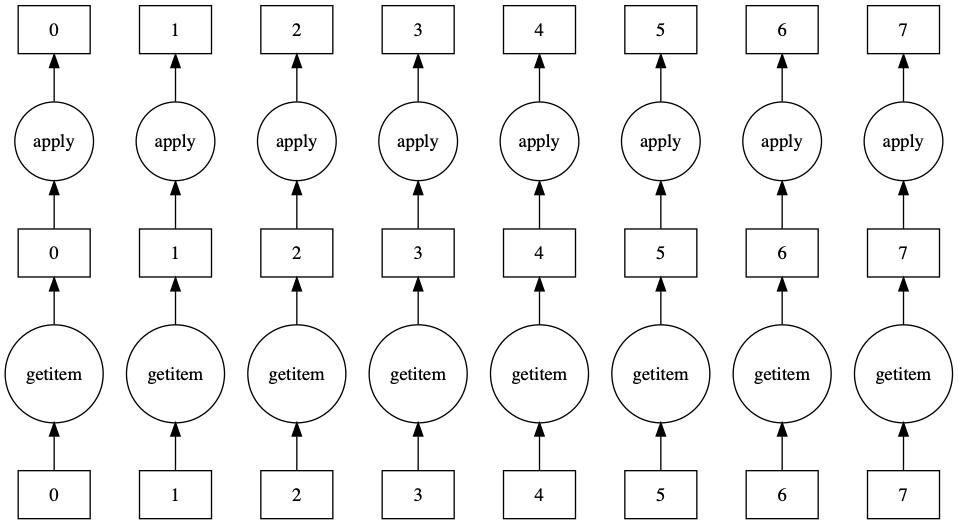

In [85]:
%%time
dask_col.visualize()

In [88]:
%%time
new_col = dask_col.compute()

CPU times: user 498 ms, sys: 64.3 ms, total: 562 ms
Wall time: 596 ms


In [89]:
ddf.dtypes

conn_state         object
duration          float64
history            object
id.orig_h          object
id.orig_p           int64
id.resp_h          object
id.resp_p           int64
local_orig           bool
local_resp           bool
missed_bytes        int64
orig_bytes        float64
orig_cc            object
orig_ip_bytes       int64
orig_pkts           int64
proto              object
resp_bytes        float64
resp_cc            object
resp_ip_bytes       int64
resp_pkts           int64
service            object
ts                 object
tunnel_parents     object
uid                object
dtype: object

In [96]:
%%time
orig_missed_b = ddf.groupby(["id.orig_h"])["missed_bytes"].apply(lambda x: max(x), meta=("missed_bytes", "int")).compute()

CPU times: user 2.59 s, sys: 518 ms, total: 3.1 s
Wall time: 3.04 s


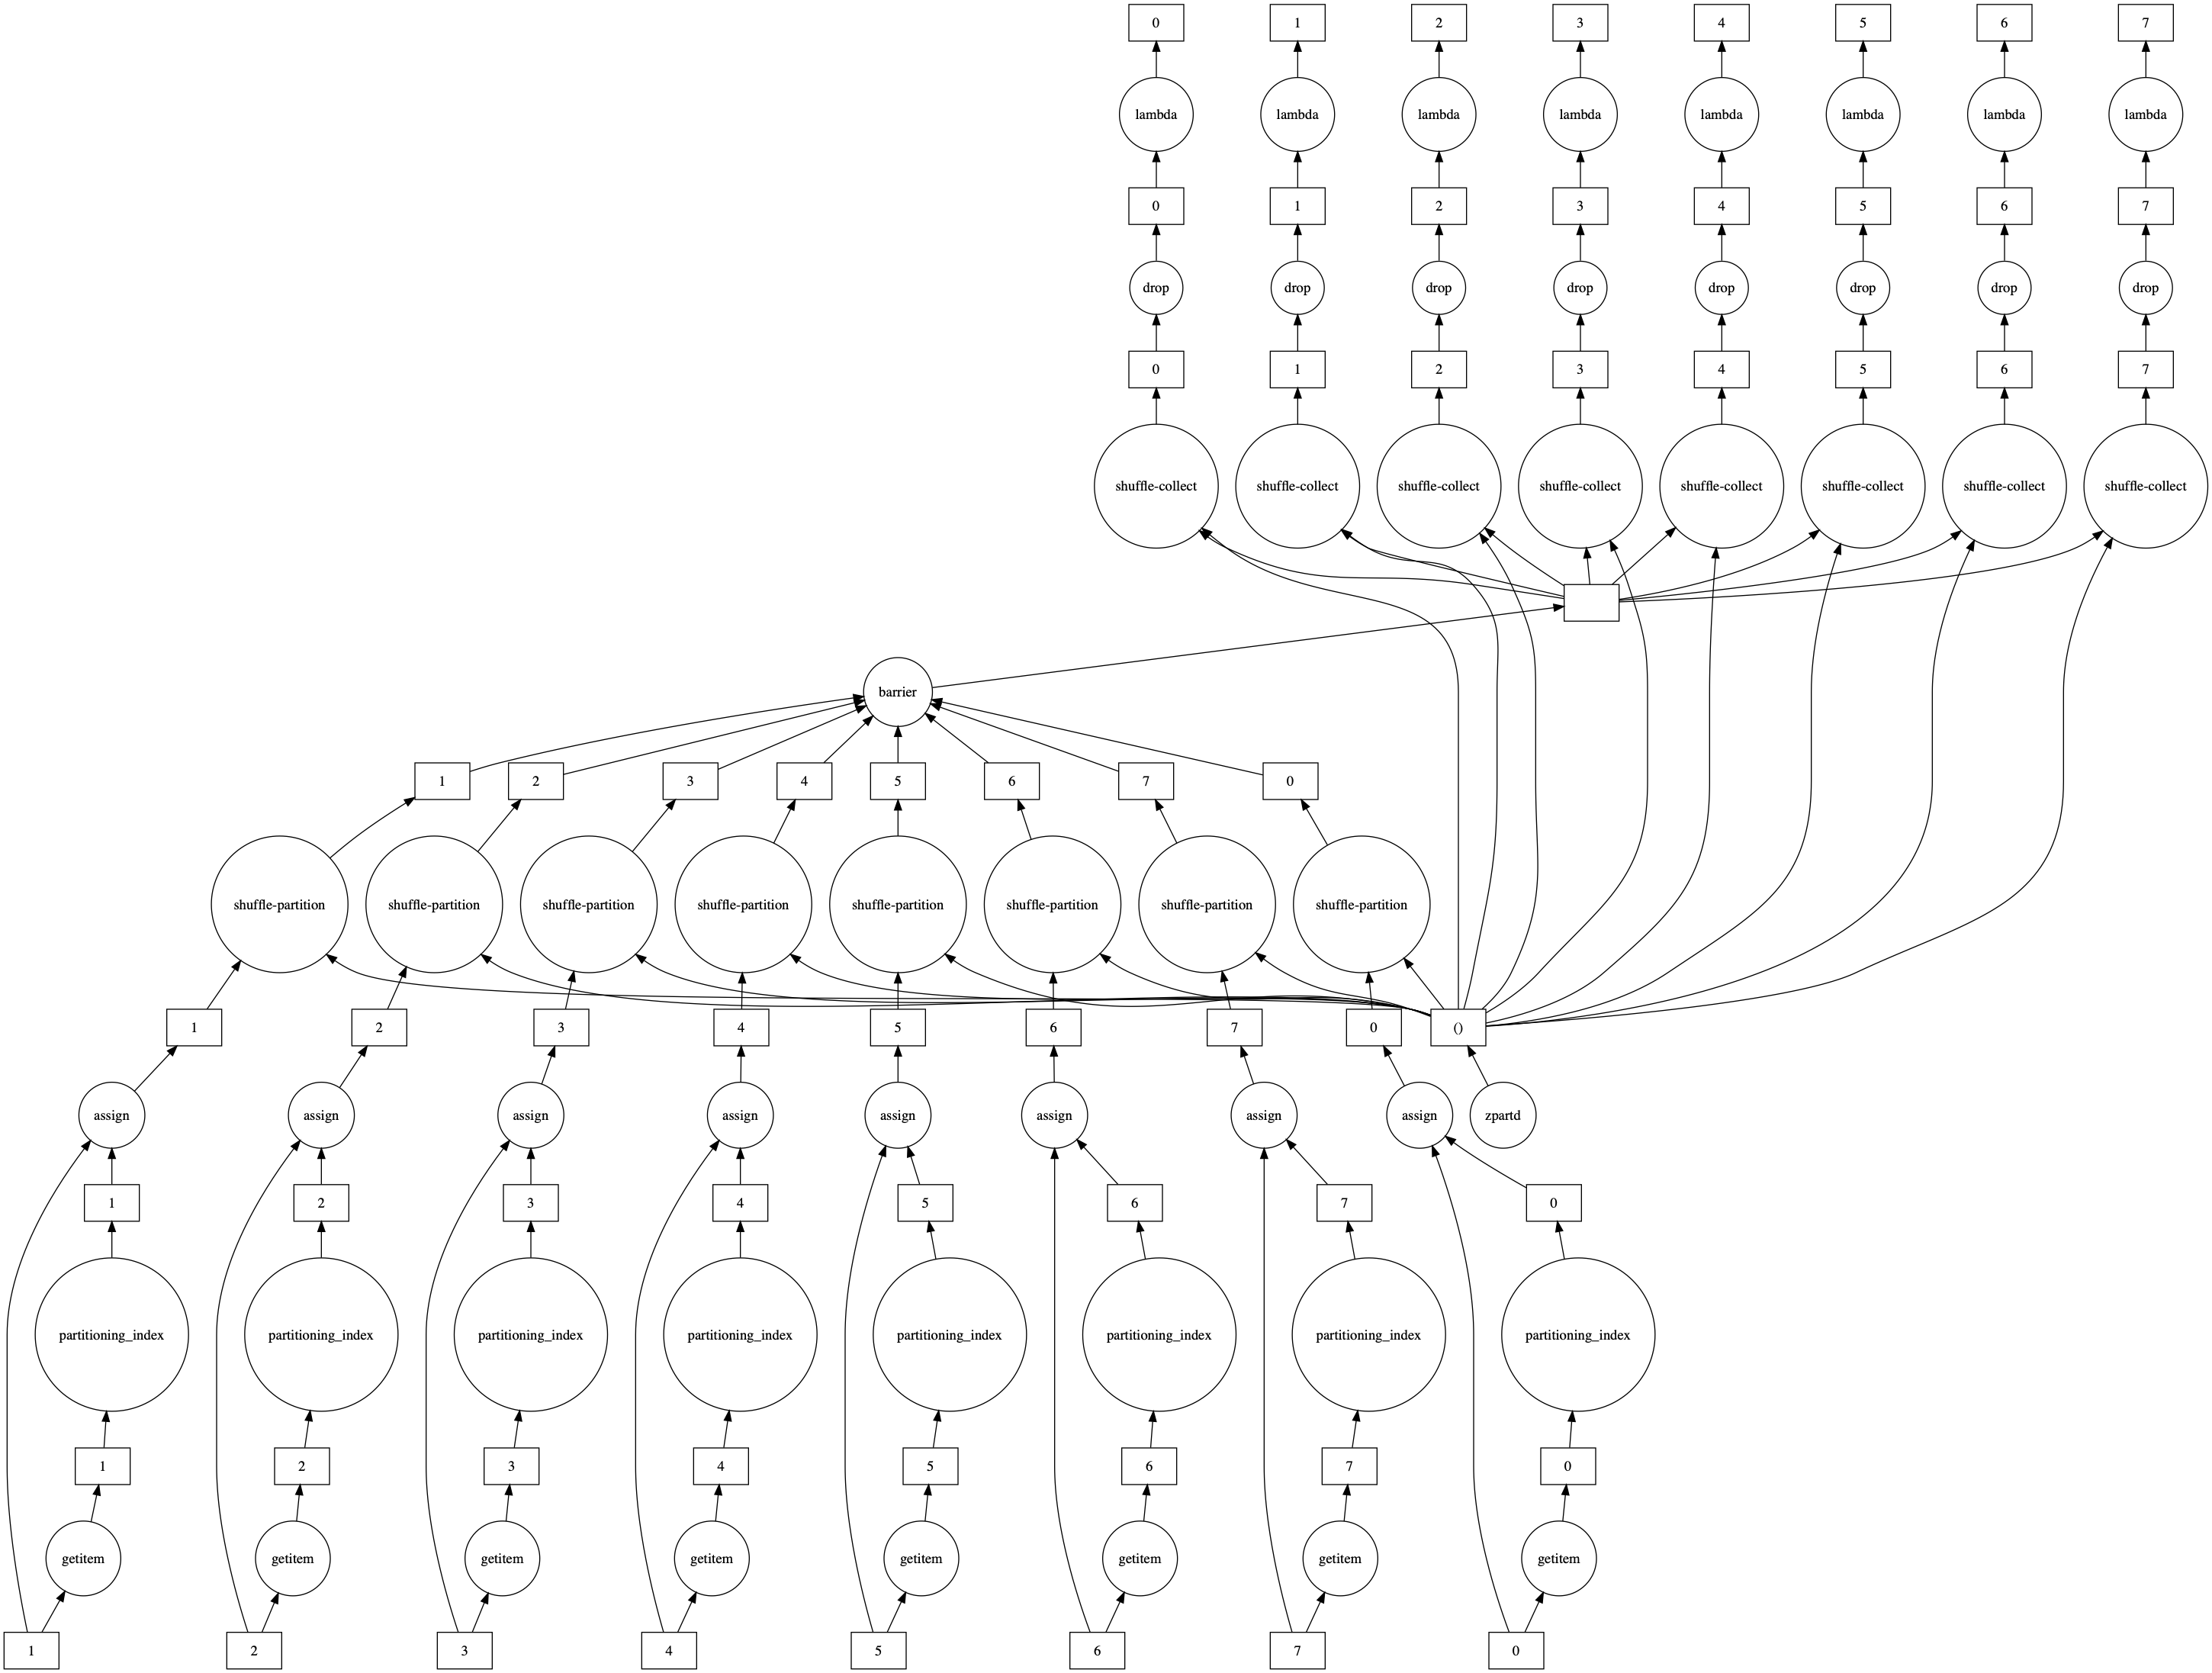

In [93]:
ddf.groupby(["id.orig_h"])["missed_bytes"].apply(lambda x: max(x), meta=("missed_bytes", "int")).visualize()

In [97]:
%%time
orig_missed_b_pd = df2.groupby(["id.orig_h"])["missed_bytes"].apply(lambda x: max(x))

CPU times: user 475 ms, sys: 13.4 ms, total: 489 ms
Wall time: 497 ms
